## Tensorflow Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf


%matplotlib inline
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
diabetes = pd.read_csv("./tensorflow_course_resources/02-TensorFlow-Basics/pima-indians-diabetes.csv")

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration',
                'Blood_pressure', 'Triceps', 'Insulin',
                'BMI', 'Pedigree']

In [11]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [15]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [18]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

<Axes: >

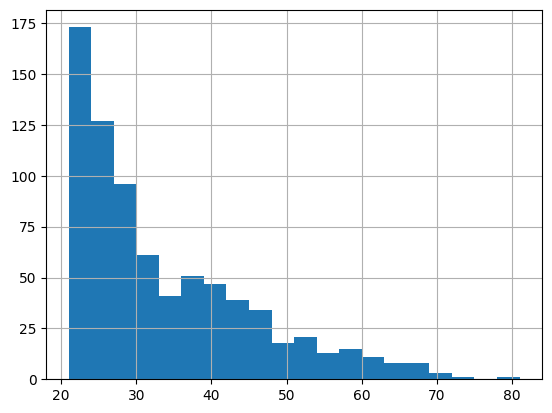

In [19]:
diabetes["Age"].hist(bins=20)

In [20]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [22]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [23]:
# Train-test split
from sklearn.model_selection import train_test_split

x_data = diabetes.drop("Class", axis=1)
labels = diabetes["Class"]

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [53]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
X_train.shape, y_train.shape

((537, 9), (537,))

In [25]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\marco\\AppData\\Local\\Temp\\tmp82_756tw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master'

In [26]:
model.train(input_fn=input_func)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipeline

INFO:tensorflow:global_step/sec: 634.857
INFO:tensorflow:loss = 5.388566, step = 2101 (0.158 sec)
INFO:tensorflow:global_step/sec: 675.59
INFO:tensorflow:loss = 4.4663215, step = 2201 (0.148 sec)
INFO:tensorflow:global_step/sec: 664.077
INFO:tensorflow:loss = 5.318804, step = 2301 (0.154 sec)
INFO:tensorflow:global_step/sec: 573.833
INFO:tensorflow:loss = 4.563615, step = 2401 (0.171 sec)
INFO:tensorflow:global_step/sec: 584.803
INFO:tensorflow:loss = 6.1154103, step = 2501 (0.170 sec)
INFO:tensorflow:global_step/sec: 670.825
INFO:tensorflow:loss = 3.8063583, step = 2601 (0.149 sec)
INFO:tensorflow:global_step/sec: 600.311
INFO:tensorflow:loss = 2.5540953, step = 2701 (0.168 sec)
INFO:tensorflow:global_step/sec: 567.639
INFO:tensorflow:loss = 2.3950372, step = 2801 (0.175 sec)
INFO:tensorflow:global_step/sec: 605.923
INFO:tensorflow:loss = 4.6824512, step = 2901 (0.165 sec)
INFO:tensorflow:global_step/sec: 651.276
INFO:tensorflow:loss = 4.71924, step = 3001 (0.155 sec)
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 641.024
INFO:tensorflow:loss = 4.538253, step = 9901 (0.156 sec)
INFO:tensorflow:global_step/sec: 684.818
INFO:tensorflow:loss = 6.2617674, step = 10001 (0.146 sec)
INFO:tensorflow:global_step/sec: 649.347
INFO:tensorflow:loss = 5.8047357, step = 10101 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.715
INFO:tensorflow:loss = 4.925729, step = 10201 (0.158 sec)
INFO:tensorflow:global_step/sec: 555.446
INFO:tensorflow:loss = 3.934145, step = 10301 (0.189 sec)
INFO:tensorflow:global_step/sec: 571.426
INFO:tensorflow:loss = 4.089426, step = 10401 (0.166 sec)
INFO:tensorflow:global_step/sec: 640.943
INFO:tensorflow:loss = 5.0245476, step = 10501 (0.156 sec)
INFO:tensorflow:global_step/sec: 624.812
INFO:tensorflow:loss = 3.5509663, step = 10601 (0.160 sec)
INFO:tensorflow:global_step/sec: 670.997
INFO:tensorflow:loss = 5.1374474, step = 10701 (0.148 sec)
INFO:tensorflow:global_step/sec: 651.395
INFO:tensorflow:loss = 4.371394, step = 10801 (0.154 sec)
INFO:t

INFO:tensorflow:global_step/sec: 649.242
INFO:tensorflow:loss = 7.592931, step = 17601 (0.156 sec)
INFO:tensorflow:global_step/sec: 606.066
INFO:tensorflow:loss = 5.6571245, step = 17701 (0.166 sec)
INFO:tensorflow:global_step/sec: 581.297
INFO:tensorflow:loss = 4.825919, step = 17801 (0.170 sec)
INFO:tensorflow:global_step/sec: 598.688
INFO:tensorflow:loss = 5.500599, step = 17901 (0.167 sec)
INFO:tensorflow:global_step/sec: 602.285
INFO:tensorflow:loss = 7.132751, step = 18001 (0.165 sec)
INFO:tensorflow:global_step/sec: 662.256
INFO:tensorflow:loss = 7.147282, step = 18101 (0.152 sec)
INFO:tensorflow:global_step/sec: 671.138
INFO:tensorflow:loss = 7.226147, step = 18201 (0.150 sec)
INFO:tensorflow:global_step/sec: 691.979
INFO:tensorflow:loss = 5.616735, step = 18301 (0.146 sec)
INFO:tensorflow:global_step/sec: 655.663
INFO:tensorflow:loss = 4.3916426, step = 18401 (0.151 sec)
INFO:tensorflow:global_step/sec: 655.464
INFO:tensorflow:loss = 6.344886, step = 18501 (0.153 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 668.685
INFO:tensorflow:loss = 1.9081423, step = 25901 (0.150 sec)
INFO:tensorflow:global_step/sec: 647.085
INFO:tensorflow:loss = 5.1822433, step = 26001 (0.155 sec)
INFO:tensorflow:global_step/sec: 665.417
INFO:tensorflow:loss = 4.669106, step = 26101 (0.150 sec)
INFO:tensorflow:global_step/sec: 677.894
INFO:tensorflow:loss = 4.0597334, step = 26201 (0.148 sec)
INFO:tensorflow:global_step/sec: 677.895
INFO:tensorflow:loss = 3.2039, step = 26301 (0.146 sec)
INFO:tensorflow:global_step/sec: 645.065
INFO:tensorflow:loss = 8.659512, step = 26401 (0.155 sec)
INFO:tensorflow:global_step/sec: 671.142
INFO:tensorflow:loss = 4.8807373, step = 26501 (0.149 sec)
INFO:tensorflow:global_step/sec: 634.746
INFO:tensorflow:loss = 3.9645338, step = 26601 (0.158 sec)
INFO:tensorflow:global_step/sec: 660.02
INFO:tensorflow:loss = 5.1244707, step = 26701 (0.153 sec)
INFO:tensorflow:global_step/sec: 602.314
INFO:tensorflow:loss = 5.135104, step = 26801 (0.165 sec)
INFO:te

INFO:tensorflow:loss = 3.863029, step = 34101 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.673
INFO:tensorflow:loss = 7.745475, step = 34201 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.672
INFO:tensorflow:loss = 6.680207, step = 34301 (0.148 sec)
INFO:tensorflow:global_step/sec: 662.256
INFO:tensorflow:loss = 2.3689024, step = 34401 (0.151 sec)
INFO:tensorflow:global_step/sec: 735.298
INFO:tensorflow:loss = 4.1613145, step = 34501 (0.136 sec)
INFO:tensorflow:global_step/sec: 666.663
INFO:tensorflow:loss = 4.1830115, step = 34601 (0.150 sec)
INFO:tensorflow:global_step/sec: 645.156
INFO:tensorflow:loss = 3.308712, step = 34701 (0.156 sec)
INFO:tensorflow:global_step/sec: 735.595
INFO:tensorflow:loss = 5.0686755, step = 34801 (0.135 sec)
INFO:tensorflow:global_step/sec: 719.422
INFO:tensorflow:loss = 5.260678, step = 34901 (0.140 sec)
INFO:tensorflow:global_step/sec: 643.021
INFO:tensorflow:loss = 7.8384113, step = 35001 (0.155 sec)
INFO:tensorflow:global_step/sec: 662.253
INFO:

INFO:tensorflow:global_step/sec: 675.672
INFO:tensorflow:loss = 6.7827177, step = 42401 (0.148 sec)
INFO:tensorflow:global_step/sec: 662.208
INFO:tensorflow:loss = 2.759856, step = 42501 (0.151 sec)
INFO:tensorflow:global_step/sec: 689.654
INFO:tensorflow:loss = 4.051168, step = 42601 (0.145 sec)
INFO:tensorflow:global_step/sec: 625.043
INFO:tensorflow:loss = 4.084849, step = 42701 (0.160 sec)
INFO:tensorflow:global_step/sec: 657.899
INFO:tensorflow:loss = 4.1643057, step = 42801 (0.154 sec)
INFO:tensorflow:global_step/sec: 709.159
INFO:tensorflow:loss = 4.303639, step = 42901 (0.139 sec)
INFO:tensorflow:global_step/sec: 671.187
INFO:tensorflow:loss = 3.7450294, step = 43001 (0.150 sec)
INFO:tensorflow:global_step/sec: 636.899
INFO:tensorflow:loss = 3.5591474, step = 43101 (0.156 sec)
INFO:tensorflow:global_step/sec: 689.718
INFO:tensorflow:loss = 5.029657, step = 43201 (0.145 sec)
INFO:tensorflow:global_step/sec: 704.223
INFO:tensorflow:loss = 4.5923963, step = 43301 (0.142 sec)
INFO:

INFO:tensorflow:loss = 3.648758, step = 50601 (0.153 sec)
INFO:tensorflow:global_step/sec: 584.764
INFO:tensorflow:loss = 2.9927397, step = 50701 (0.172 sec)
INFO:tensorflow:global_step/sec: 714.345
INFO:tensorflow:loss = 6.3756313, step = 50801 (0.140 sec)
INFO:tensorflow:global_step/sec: 689.593
INFO:tensorflow:loss = 2.4415352, step = 50901 (0.145 sec)
INFO:tensorflow:global_step/sec: 625.047
INFO:tensorflow:loss = 2.4552102, step = 51001 (0.159 sec)
INFO:tensorflow:global_step/sec: 671.086
INFO:tensorflow:loss = 2.653494, step = 51101 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.942
INFO:tensorflow:loss = 2.7189996, step = 51201 (0.151 sec)
INFO:tensorflow:global_step/sec: 680.222
INFO:tensorflow:loss = 5.0536027, step = 51301 (0.147 sec)
INFO:tensorflow:global_step/sec: 653.643
INFO:tensorflow:loss = 5.437045, step = 51401 (0.153 sec)
INFO:tensorflow:global_step/sec: 675.626
INFO:tensorflow:loss = 5.5954256, step = 51501 (0.148 sec)
INFO:tensorflow:global_step/sec: 680.331
INF

In [27]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [28]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-05T21:37:31
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\marco\AppData\Local\Temp\tmp82_756tw\model.ckpt-53700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.58782s
INFO:tensorflow:Finished evaluation at 2023-06-05-21:37:31
INFO:tensorflow:Saving dict for global step 53700: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.84444445, auc_precision_recall = 0.7302723, average_loss = 0.46608117, global_step = 53700, label/mean = 0.35064936, loss = 4.486031, precision = 0.6805556, prediction/mean = 0.3623217, recall = 0.60493827
INFO:tensorflow:Saving '

In [29]:
results

{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84444445,
 'auc_precision_recall': 0.7302723,
 'average_loss': 0.46608117,
 'label/mean': 0.35064936,
 'loss': 4.486031,
 'precision': 0.6805556,
 'prediction/mean': 0.3623217,
 'recall': 0.60493827,
 'global_step': 53700}

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [32]:
preds = model.predict(pred_input_func)
my_predictions = list(preds)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\marco\AppData\Local\Temp\tmp82_756tw\model.ckpt-53700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
my_predictions

[{'logits': array([-0.09325504], dtype=float32),
  'logistic': array([0.47670314], dtype=float32),
  'probabilities': array([0.5232969 , 0.47670314], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([1.6597116], dtype=float32),
  'logistic': array([0.8401993], dtype=float32),
  'probabilities': array([0.15980071, 0.84019923], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.4400005], dtype=float32),
  'logistic': array([0.19154526], dtype=float32),
  'probabilities': array([0.80845475, 0.19154526], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

#### Dense Neural Network

In [37]:
# Need to transform categorical cols into embedding_column
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [47]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\marco\\AppData\\Local\\Temp\\tmpjq15qraq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\marco\AppData\Local\Temp\tmpjq15qraq\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.8669305, step = 1
INFO:tensorflow:global_step/sec: 378.724
INFO:tensorflow:loss = 4.9707537, step = 101 (0.267 sec)
INFO:tensorflow:global_step/sec: 558.558
INFO:tensorflow:loss = 3.5249934, step = 201 (0.177 sec)
INFO:tensorflow:global_step/sec: 604.045
INFO:tensorflow:loss = 7.668674, step = 301 (0.165 sec)
INFO:tensorflow:global_step/sec: 589.916
INFO:tensorflow:loss = 6.096561, step = 401 (0.170 sec)
INFO:tensorflow:global_step/sec: 584.693
INFO:tensorflow:loss = 4.854019, ste

In [50]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [51]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-05T21:48:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\marco\AppData\Local\Temp\tmpjq15qraq\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.58511s
INFO:tensorflow:Finished evaluation at 2023-06-05-21:48:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8460494, auc_precision_recall = 0.72022533, average_loss = 0.46501073, global_step = 1000, label/mean = 0.35064936, loss = 4.4757285, precision = 0.6666667, prediction/mean = 0.36535126, recall = 0.69135803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\marco\AppData\Local\Temp\tmpjq15qraq\model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8460494,
 'auc_precision_recall': 0.72022533,
 'average_loss': 0.46501073,
 'label/mean': 0.35064936,
 'loss': 4.4757285,
 'precision': 0.6666667,
 'prediction/mean': 0.36535126,
 'recall': 0.69135803,
 'global_step': 1000}